# Homework for CLIM 680: Climate Data

**Shammunul Islam (sislam27@mason.edu)**

### Temperature ☀️ analysis of South-Asia using APHRODITE Water Resources project's data

I tried to visually explore temperature data of South Asia data provided by [APHRODITE Water Resources project](https://www.chikyu.ac.jp/precip/english/downloads.html?fbclid=IwAR1P-1G9nxc8SQV0WfF2cA7mnGvRjI5RDB3RfEhpNuGBh2-im35TPNzDVAM). Using Python along with XArray, Cartopy, matplotlib I visualized maps of temperature. A comparison of temperature between 1961 and 2015 is also made. I also made an attempt to understand how June, July, August, September (JJAS) temperature changed over time by making an animation map where at each step of the animation, average temperature of JJAS is plotted.

This repository will be continuously updated as the course will go on.

### Data Description -- The APHRODITE Water Resources project

The APHRODITE Water Resources project is working on a series of precipitation products and this project completed its first phase in 2010 and embarked on its second phase in 2016, partnering with Hirosaki University, Kyoto University, and Chiba University. 

Daily mean temperature values are provided by their AphroTemp_V1808 at 0.50 and 0.25 degree grid resolutions. These readings are produced by extrapolating information from meteorological stations dispersed throughout the targeted area. After the release of AphroTemp_V1204R1, surface data from nations including India, Bhutan, Thailand, and Myanmar was included. The accuracy of the temperature readings in South Asia in the most recent version has been improved by this inclusion, along with updated interpolation methods and climatic data. For a better understanding of this dataset, you can refer to this [documentation](http://aphrodite.st.hirosaki-u.ac.jp/product/APHRO_V1808_TEMP/AphroTemp_V1808_readme.txt)

### The major characteristics of the dataset

- Spatial and Temporal Coverage

   * Spatial coverage      :  (MA) 60.0E - 150.0E, 15.0S - 55.0N
   * Spatial resolution    :  0.5 degree and 0.25 degree latitude/longitude
   * Temporal coverage     :  1961-2015
   * Temporal resolution   :  Daily

- Units
   * Daily mean temperature :  degC
   * Ratio of 0.05 grid box containing station(s) :  %

- Missing Code

   * Daily mean temperature :  -99.9
   * Ratio of 0.05 grid box containing station(s) :  -99.9

### Import all the necessary packages

In [14]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
#!pip install --user cartopy

In [15]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [16]:
fname = 'APHRO_MA_TAVE_025deg_V1808.1961.nc.nc'
ds_1961 = xr.open_dataset(fname)
ds_1961

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 280, time: 365)
Coordinates:
  * lon      (lon) float64 60.12 60.38 60.62 60.88 ... 149.1 149.4 149.6 149.9
  * lat      (lat) float64 -14.88 -14.62 -14.38 -14.12 ... 54.38 54.62 54.88
  * time     (time) datetime64[ns] 1961-01-01 1961-01-02 ... 1961-12-31
Data variables:
    tave     (time, lat, lon) float32 ...
    rstn     (time, lat, lon) float32 ...
Attributes:
    title:    APHRO_MA V1808 daily temperature with 0.25deg grids

We see that this data has three coordinates, one corresponding to **lon** or longitude, **lat** or latitude and **time** which has 365 values or 365 days.

In [17]:
ds_mean_1961=ds_1961.mean(dim='time')

In [18]:
ds_mean_1961

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 280)
Coordinates:
  * lon      (lon) float64 60.12 60.38 60.62 60.88 ... 149.1 149.4 149.6 149.9
  * lat      (lat) float64 -14.88 -14.62 -14.38 -14.12 ... 54.38 54.62 54.88
Data variables:
    tave     (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    rstn     (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

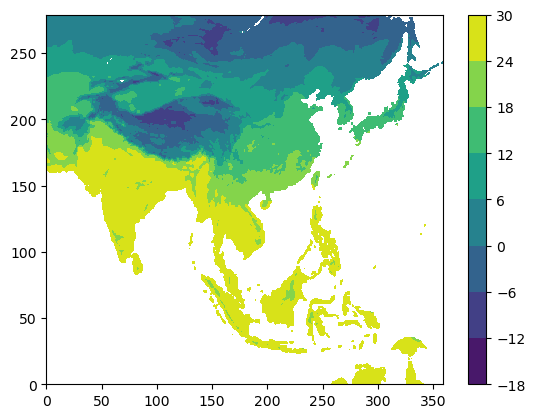

In [19]:
plt.contourf(ds_mean_1961['tave'])
plt.colorbar() ;

Now, let's plot a more refined map with more values for the colorbar.

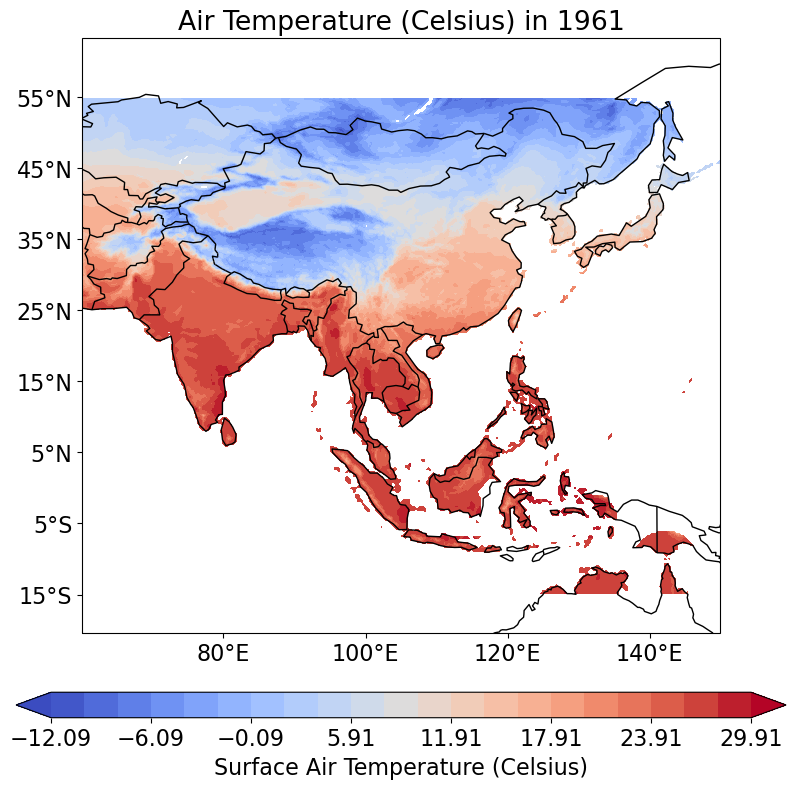

In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature

# Assuming ds_mean_1961 and ds_1961 are your data sources

# Make the figure larger
fig = plt.figure(figsize=(11, 8.5))

# Set the axes using the specified map projection
# Adjust the position of the map to leave space for the colorbar
ax = plt.axes([0.05, 0.2, 0.9, 0.7], projection=ccrs.PlateCarree())

# Add cyclic point to data
data = ds_mean_1961['tave']
data, lons = add_cyclic_point(data, coord=ds_1961['lon'])

# Define levels for finer intervals, ignoring NaNs
level_interval = 2  # Change this value as needed
levels = np.arange(np.nanmin(data), np.nanmax(data) + level_interval, level_interval)

# Make a filled contour plot with specified levels
cs = ax.contourf(lons, ds_1961['lat'], data, levels=levels,
                 transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

# Add coastlines
ax.coastlines()
# Add country boundaries
ax.add_feature(cfeature.BORDERS, edgecolor='black')

# Define the xticks for longitude
lon_range = np.arange(np.floor(ds_1961['lon'].min()), np.ceil(ds_1961['lon'].max()) + 1, 20)
ax.set_xticks(lon_range, crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
lat_range = np.arange(np.floor(ds_1961['lat'].min()), np.ceil(ds_1961['lat'].max()) + 1, 10)
ax.set_yticks(lat_range, crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 

# Define the longitude and latitude range
ax.set_extent([ds_1961['lon'].min(), ds_1961['lon'].max(), ds_1961['lat'].min(), ds_1961['lat'].max()])

# Add title
plt.title("Air Temperature (Celsius) in 1961")

# Create a new axes for the colorbar just below the map
cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.03]) # Adjust these values as needed
cbar = plt.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Surface Air Temperature (Celsius)')

# Save and show the plot
plt.savefig('air_temp_1961.png', dpi=300, bbox_inches='tight')
plt.show()

Now, let's have a look at the temperature from 2015 and try to see if the temperature pattern looks similar or not.

We start by loading dataset for 2015.

In [14]:
fname = 'APHRO_MA_TAVE_025deg_V1808.2015.nc.nc'
ds_2015 = xr.open_dataset(fname)

Create a mean of temperature for 2015.

In [15]:
ds_mean_2015=ds_2015.mean(dim='time')

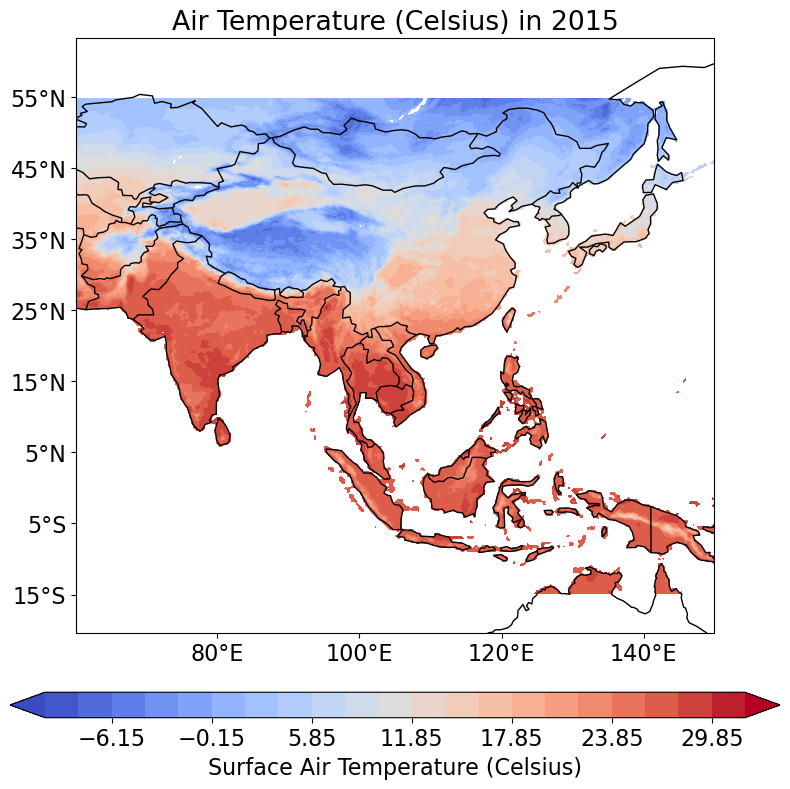

In [27]:
# Make the figure larger
fig = plt.figure(figsize=(11, 8.5))

# Set the axes using the specified map projection
# Adjust the position of the map to leave space for the colorbar
ax = plt.axes([0.05, 0.2, 0.9, 0.7], projection=ccrs.PlateCarree())

# Add cyclic point to data
data = ds_mean_2015['tave']
data, lons = add_cyclic_point(data, coord=ds_2015['lon'])

# Define levels for finer intervals, ignoring NaNs
level_interval = 2  # Change this value as needed
levels = np.arange(np.nanmin(data), np.nanmax(data) + level_interval, level_interval)

# Make a filled contour plot with specified levels
cs = ax.contourf(lons, ds_2015['lat'], data, levels=levels,
                 transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

# Add coastlines
ax.coastlines()
# Add country boundaries
ax.add_feature(cfeature.BORDERS, edgecolor='black')

# Define the xticks for longitude
lon_range = np.arange(np.floor(ds_2015['lon'].min()), np.ceil(ds_2015['lon'].max()) + 1, 20)
ax.set_xticks(lon_range, crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
lat_range = np.arange(np.floor(ds_2015['lat'].min()), np.ceil(ds_2015['lat'].max()) + 1, 10)
ax.set_yticks(lat_range, crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 

# Define the longitude and latitude range
ax.set_extent([ds_2015['lon'].min(), ds_2015['lon'].max(), ds_2015['lat'].min(), ds_2015['lat'].max()])

# Add title
plt.title("Air Temperature (Celsius) in 2015")

# Create a new axes for the colorbar just below the map
cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.03]) # Adjust these values as needed
cbar = plt.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Surface Air Temperature (Celsius)')

plt.savefig('air_temp_2015.png', dpi=300, bbox_inches='tight')
plt.show()

### Side-by-side plot comparison for 1961 and 2015

So, here we make a visual inspection of how the average surface air temperature in 2015 is different from 1965 for the same variable.

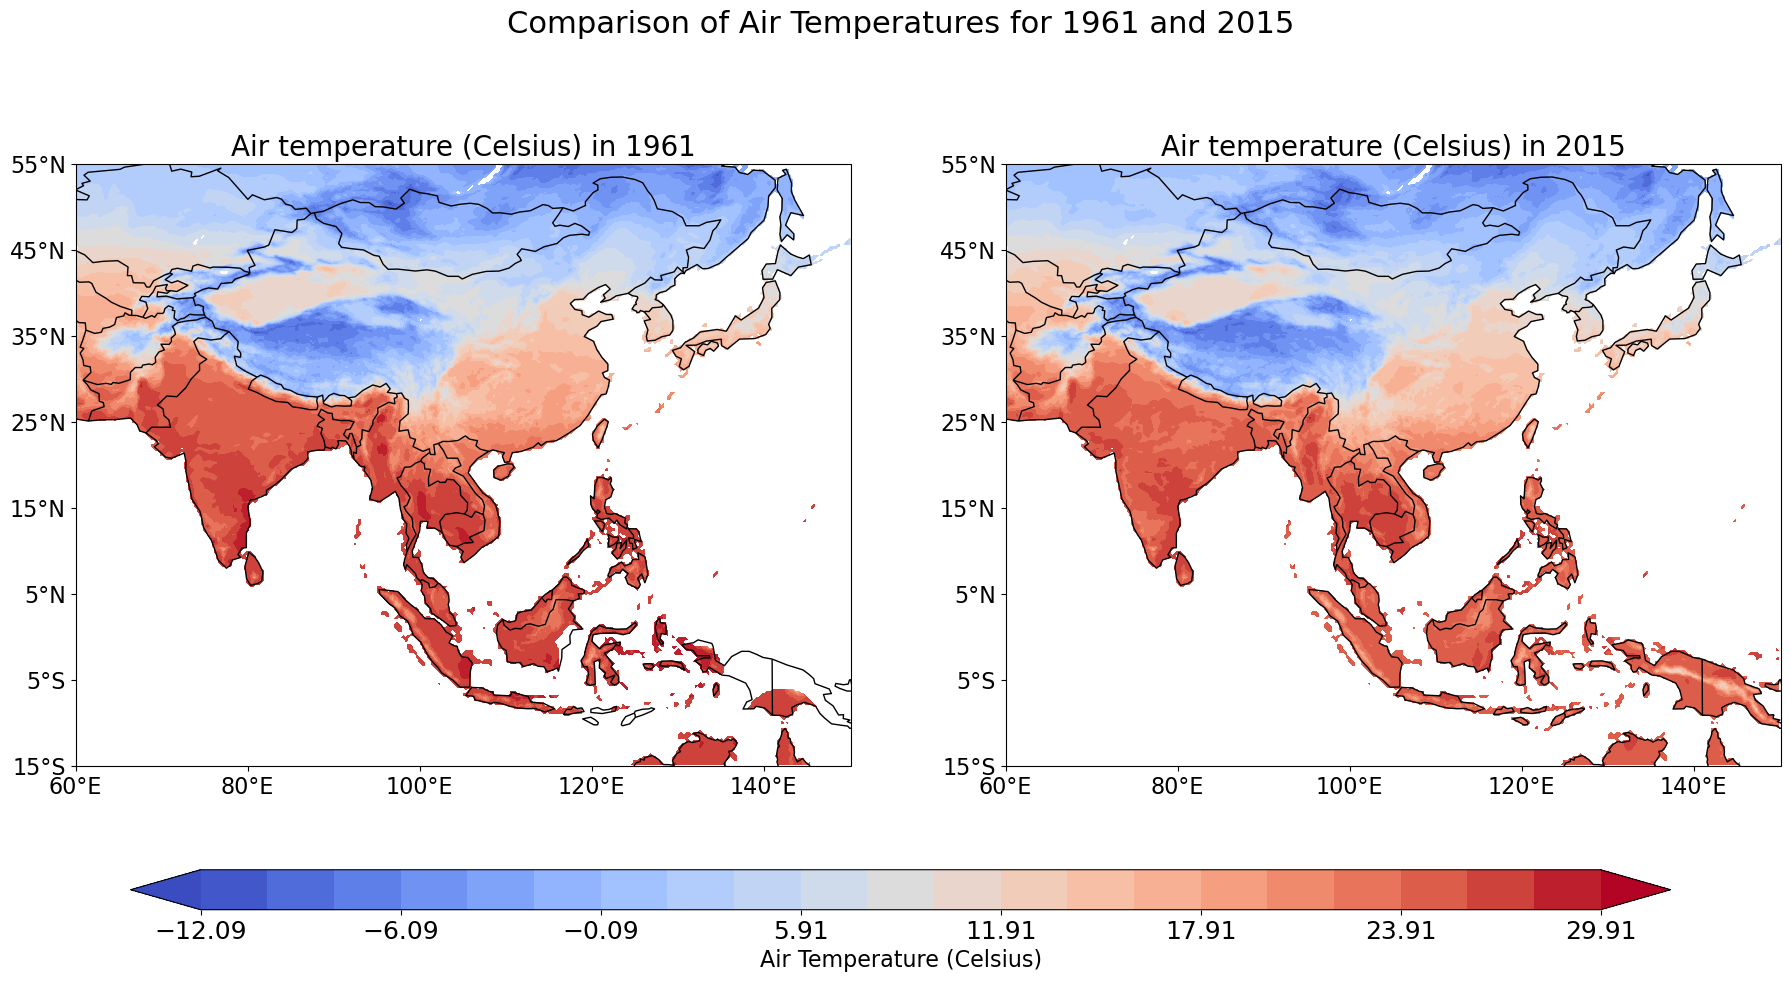

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature

# Assuming ds_mean_1961, ds_1961, ds_mean_2015 are your data sources

# Create a 1x2 grid of subplots
fig = plt.figure(figsize=(22, 10))

# Manually set the subplots for precise control over layout
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

# Increase font size for labels and titles
plt.rcParams.update({'font.size': 16})
title_fontsize = 20
label_fontsize = 18

# Common settings for both plots
level_interval = 2
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

# Plot for 1961
data_1961 = ds_mean_1961['tave']
data_1961, lons_1961 = add_cyclic_point(data_1961, coord=ds_1961['lon'])
levels_1961 = np.arange(np.nanmin(data_1961), np.nanmax(data_1961) + level_interval, level_interval)

cs1 = ax1.contourf(lons_1961, ds_1961['lat'], data_1961, levels=levels_1961,
                   transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')
ax1.coastlines()
# Country boundaries
ax1.add_feature(cfeature.BORDERS, edgecolor='black')
ax1.set_xticks(np.arange(np.floor(ds_1961['lon'].min()), np.ceil(ds_1961['lon'].max()) + 1, 20), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(np.floor(ds_1961['lat'].min()), np.ceil(ds_1961['lat'].max()) + 1, 10), crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_title("Air temperature (Celsius) in 1961", fontsize=title_fontsize)

# Plot for 2015
data_2015 = ds_mean_2015['tave']
data_2015, lons_2015 = add_cyclic_point(data_2015, coord=ds_1961['lon'])
levels_2015 = np.arange(np.nanmin(data_2015), np.nanmax(data_2015) + level_interval, level_interval)

cs2 = ax2.contourf(lons_2015, ds_1961['lat'], data_2015, levels=levels_2015,
                   transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')
ax2.coastlines()
ax2.add_feature(cfeature.BORDERS, edgecolor='black')
ax2.set_xticks(np.arange(np.floor(ds_1961['lon'].min()), np.ceil(ds_1961['lon'].max()) + 1, 20), crs=ccrs.PlateCarree())
ax2.set_yticks(np.arange(np.floor(ds_1961['lat'].min()), np.ceil(ds_1961['lat'].max()) + 1, 10), crs=ccrs.PlateCarree())
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.set_title("Air temperature (Celsius) in 2015", fontsize=title_fontsize)

# Main title for the entire figure
fig.suptitle("Comparison of Air Temperatures for 1961 and 2015", fontsize=22, y=0.95)

# Position the colorbar
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.04])  # Adjusted to be closer to the maps
cbar = fig.colorbar(cs1, cax=cbar_ax, orientation='horizontal', label='Air Temperature (Celsius)')
cbar.ax.tick_params(labelsize=label_fontsize)

plt.savefig('air_temp_1961_2015.png', dpi=300, bbox_inches='tight')
plt.show()

They almost looked like the same and it looks like there is no difference in mean temperature between 1961 and 2015. So, now we will make an anomaly plot between this two time steps and plot this.

### Anomaly plot for the change between 2015 and 1961

In [19]:
anomaly = ds_mean_2015 - ds_mean_1961

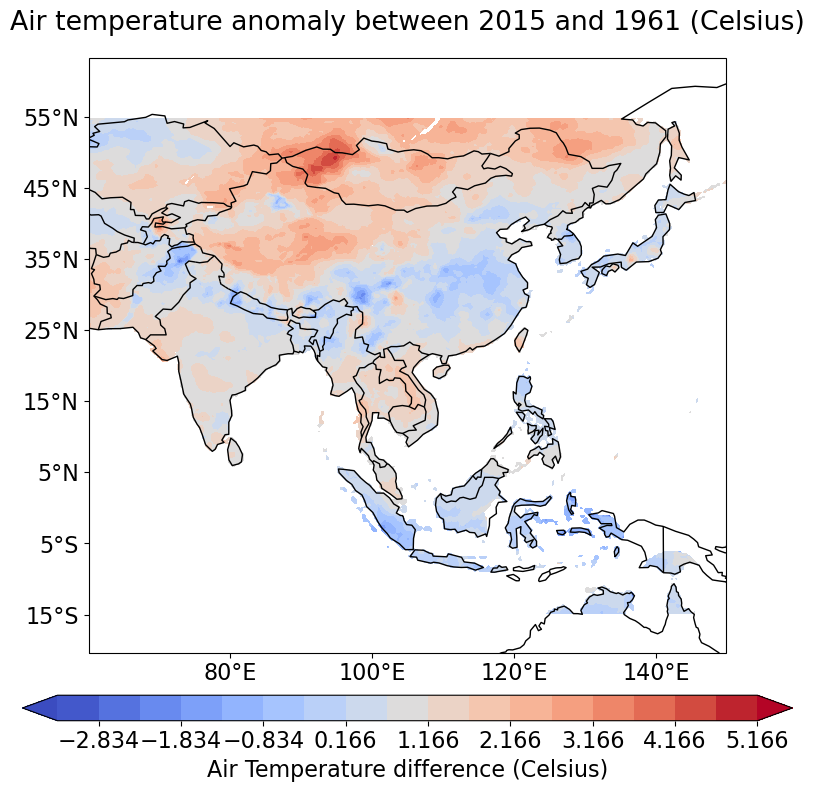

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature

# Make the figure larger
fig = plt.figure(figsize=(11, 8.5))

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree(), position=[0.05, 0.15, 0.9, 0.7])  # Adjust the position of the map

# Add cyclic point to data
data = anomaly['tave']
data, lons = add_cyclic_point(data, coord=ds_2015['lon'])

# Define levels for finer intervals, considering a more detailed range
min_val = np.nanmin(data)
max_val = np.nanmax(data)
level_interval = 0.5  # Smaller interval for more granularity
levels = np.arange(min_val, max_val + level_interval, level_interval)

# Make a filled contour plot with specified levels
cs = ax.contourf(lons, ds_2015['lat'], data, levels=levels,
                 transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

# Add coastlines
ax.coastlines()
# Country boundaries
ax.add_feature(cfeature.BORDERS, edgecolor='black')

# Define the xticks for longitude
lon_range = np.arange(np.floor(ds_2015['lon'].min()), np.ceil(ds_2015['lon'].max()) + 1, 20)
ax.set_xticks(lon_range, crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
lat_range = np.arange(np.floor(ds_2015['lat'].min()), np.ceil(ds_2015['lat'].max()) + 1, 10)
ax.set_yticks(lat_range, crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 

# Define the longitude and latitude range
ax.set_extent([ds_2015['lon'].min(), ds_2015['lon'].max(), ds_2015['lat'].min(), ds_2015['lat'].max()])

# Add title with adjusted position
plt.title("Air temperature anomaly between 2015 and 1961 (Celsius)", pad=20)

# Reposition the colorbar to increase the gap from the map
cbar_ax = fig.add_axes([0.15, 0.07, 0.7, 0.03])  # Adjusted to increase the gap
cbar = plt.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Air Temperature difference (Celsius)')

plt.savefig('air_temp_anomaly_2015_1961.png', dpi=300, bbox_inches='tight')
plt.show()

Now, we can see that there is actually some difference in air temperature between these time periods. We will now have a look at the summer time temperature difference or anomaly over this period. 

### Change of June, July, August, September (JJAS) temperature anomaly over the period from 1961 to 2015

Now, I will see whether the JJAS temperature changed over the period from 1961 to 2015.

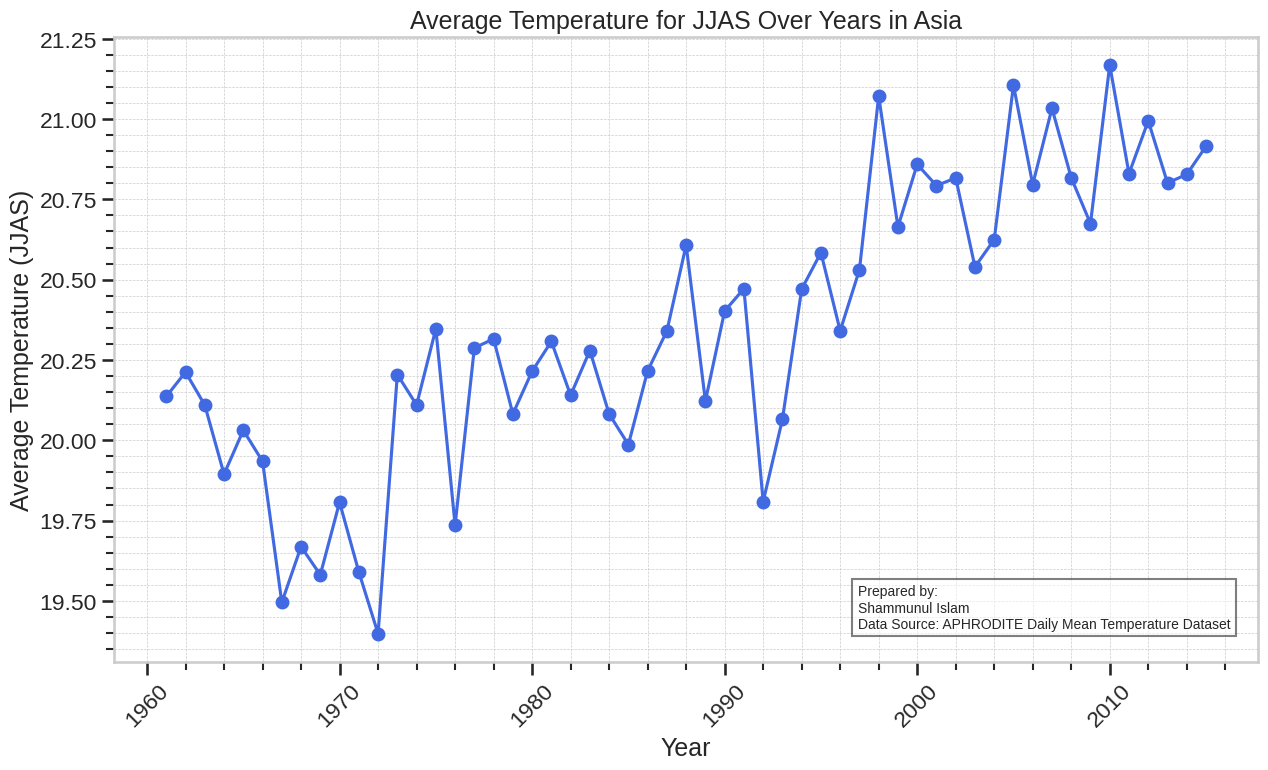

In [29]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set the style for the plot
plt.style.use('seaborn-whitegrid')
sns.set_context('talk')

# Assuming ds is your loaded xarray dataset
# Select the temperature variable (tave)
tave = ds['tave']

# Filter the dataset to include only JJAS (months 6, 7, 8, and 9)
tave_jjas = tave.sel(time=tave['time'].dt.month.isin([6, 7, 8, 9]))

# Calculate the mean for each JJAS across latitude and longitude dimensions
jjas_mean = tave_jjas.mean(dim=['lat', 'lon'])

# Group by year and then calculate the mean for each year
yearly_avg = jjas_mean.groupby('time.year').mean()

# Convert to a pandas DataFrame for plotting
yearly_avg_df = yearly_avg.to_dataframe().reset_index()

# Plotting
plt.figure(figsize=(15, 8))

plt.plot(yearly_avg_df['year'], yearly_avg_df['tave'], marker='o', linestyle='-', color='royalblue')

plt.xlabel('Year')
plt.ylabel('Average Temperature (JJAS)')
plt.title('Average Temperature for JJAS Over Years in Asia')

# Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Enhance aesthetics
plt.xticks(rotation=45)
plt.tight_layout()

# Adding minor ticks
plt.minorticks_on()

# Adding custom text
credit_text = "Prepared by:\nShammunul Islam\nData Source: APHRODITE Daily Mean Temperature Dataset"
plt.text(0.65, 0.05, credit_text, transform=plt.gca().transAxes, fontsize=10, 
         verticalalignment='bottom', horizontalalignment='left', 
         bbox=dict(facecolor='white', alpha=0.5))

# Adjust the padding of the plot, if necessary
plt.subplots_adjust(bottom=0.15, right=0.85)

# Save and show the plot
plt.savefig('average_temp_JJAS_over_years.png', dpi=300, bbox_inches='tight')
plt.show()

To have a visual understanding of the change of June, July, August, September (JJAS) air temperature between 1961 and 2015 over Asia, now an animation of the anomalies of JJAS temperature over this period will also be made. I used the average temperature for JJAS between 1961 and 2015 as the mean temperature (climatological) and then subtracted this from average JJAS temperature of each of the year between this period.

MovieWriter imagemagick unavailable; using Pillow instead.


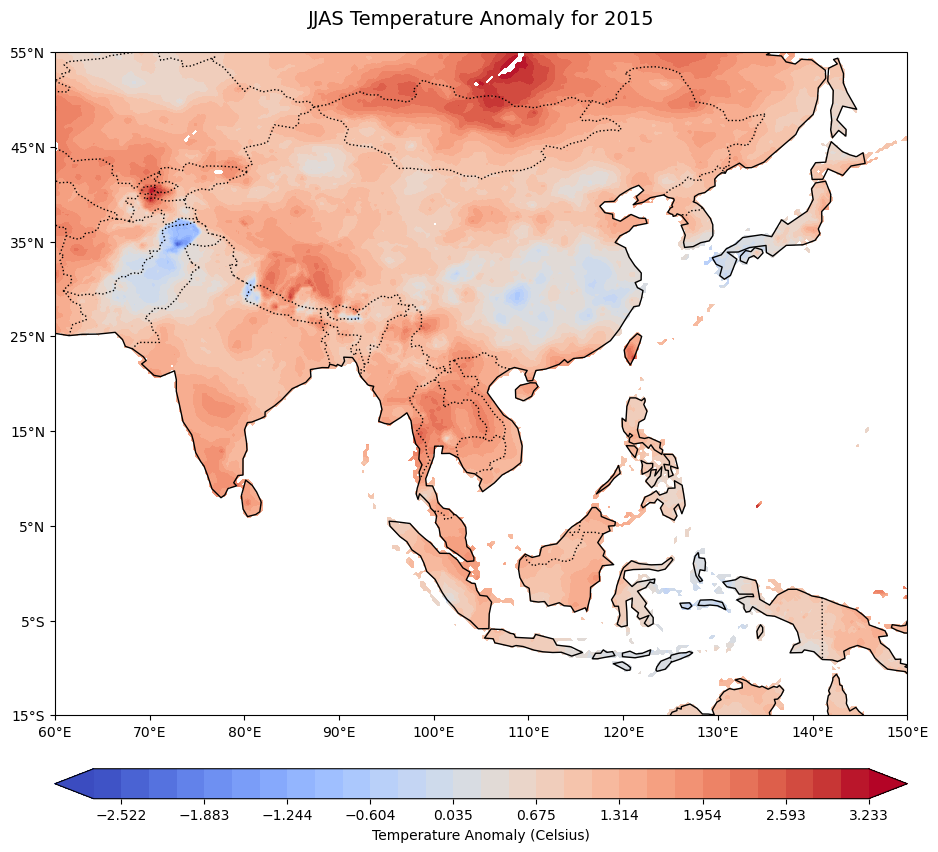

In [23]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

def load_dataset(year):
    filename = f"APHRO_MA_TAVE_025deg_V1808.{year}.nc.nc"
    ds = xr.open_dataset(filename)
    return ds

def calculate_jjas_anomaly(year, long_term_mean):
    jjas_data = load_dataset(year)['tave'].sel(time=load_dataset(year)['time.month'].isin([6, 7, 8, 9])).mean(dim='time')
    anomaly = jjas_data - long_term_mean
    return anomaly

def plot_data(data, ax):
    lons, lats = np.meshgrid(data['lon'], data['lat'])
    # Adjust the level_interval for finer gradations
    level_interval = 0.2  # Smaller interval for more detailed color gradations
    levels = np.linspace(data.min(), data.max(), num=int((data.max() - data.min()) / level_interval))
    cs = ax.contourf(lons, lats, data, levels=levels, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')
    return cs

# Compute the long-term JJAS mean (1961-2015)
long_term_mean = xr.concat([load_dataset(year)['tave'].sel(time=load_dataset(year)['time.month'].isin([6, 7, 8, 9])) for year in range(1961, 2016)], dim='time').mean(dim='time')

# Create the initial figure and axis with adjusted vertical size
fig, ax = plt.subplots(figsize=(11, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Load the first year's data to initialize the colorbar
initial_data = calculate_jjas_anomaly(1961, long_term_mean)
cs = plot_data(initial_data, ax)

# Adjust the colorbar to align with the map's extent
cbar_ax = fig.add_axes([0.125, 0.08, 0.775, 0.03])  # Slightly raise the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Temperature Anomaly (Celsius)')

def update_plot(year):
    ax.clear()
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    data = calculate_jjas_anomaly(year, long_term_mean)
    cs = plot_data(data, ax)
    ax.set_title(f"JJAS Temperature Anomaly for {year}", fontsize=14, pad=20)
    
    # Set dynamic longitude and latitude labels based on the data
    lon_range = np.arange(np.floor(data['lon'].min()), np.ceil(data['lon'].max()) + 1, 10)
    lat_range = np.arange(np.floor(data['lat'].min()), np.ceil(data['lat'].max()) + 1, 10)
    ax.set_xticks(lon_range, crs=ccrs.PlateCarree())
    ax.set_yticks(lat_range, crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())
    ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())

    return cs

# Create the animation
years = range(1961, 2016)
ani = animation.FuncAnimation(fig, update_plot, frames=years, repeat=True, blit=False)

# Save the animation as a .gif
ani.save('jjas_temperature_anomaly.gif', writer='imagemagick', fps=1.8)

plt.show()

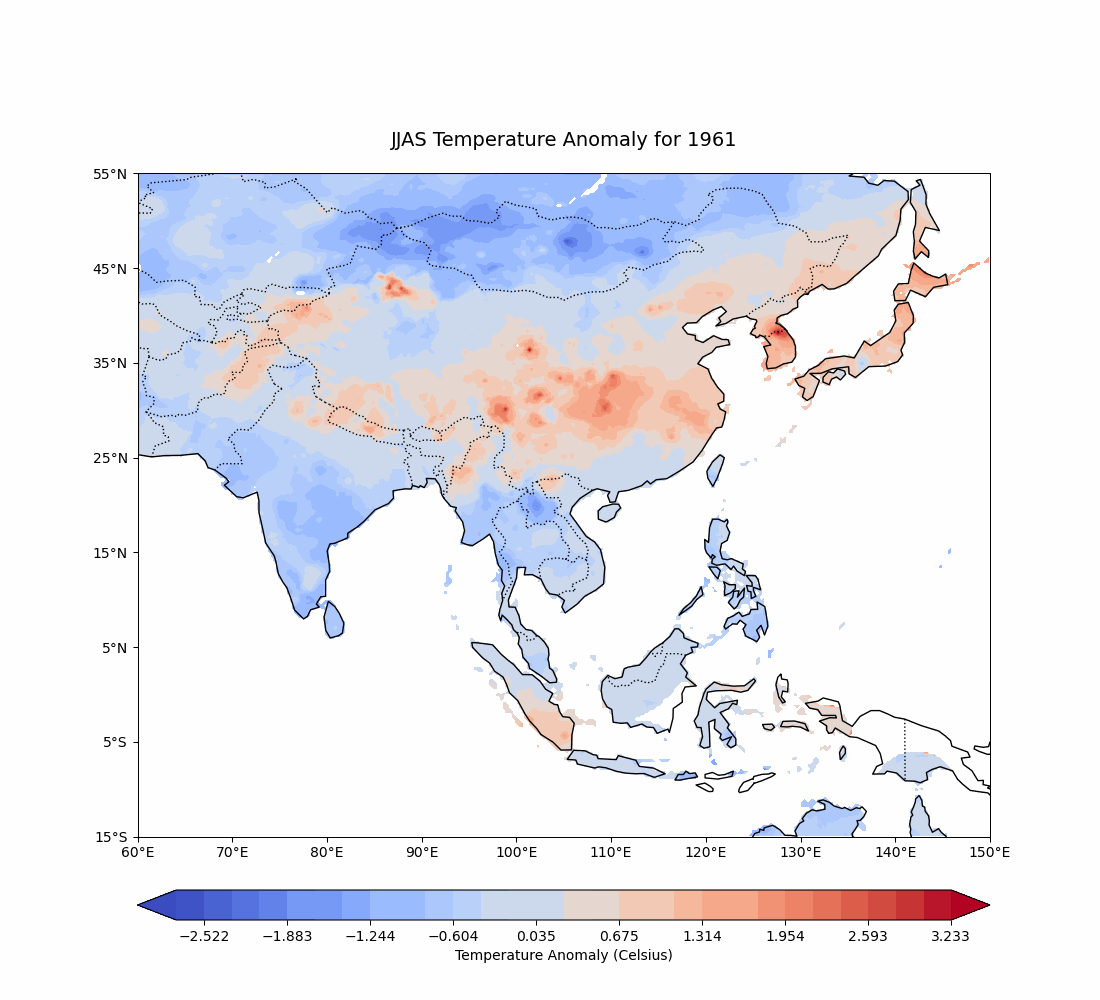

In [24]:
from IPython.display import display, Image

# Display the GIF in Jupyter Notebook
display(Image(filename='jjas_temperature_anomaly.gif'))

### Standard deviation of temperature of June, July, August, September (JJAS)

/home/sislam27/.conda/envs/clim_data/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


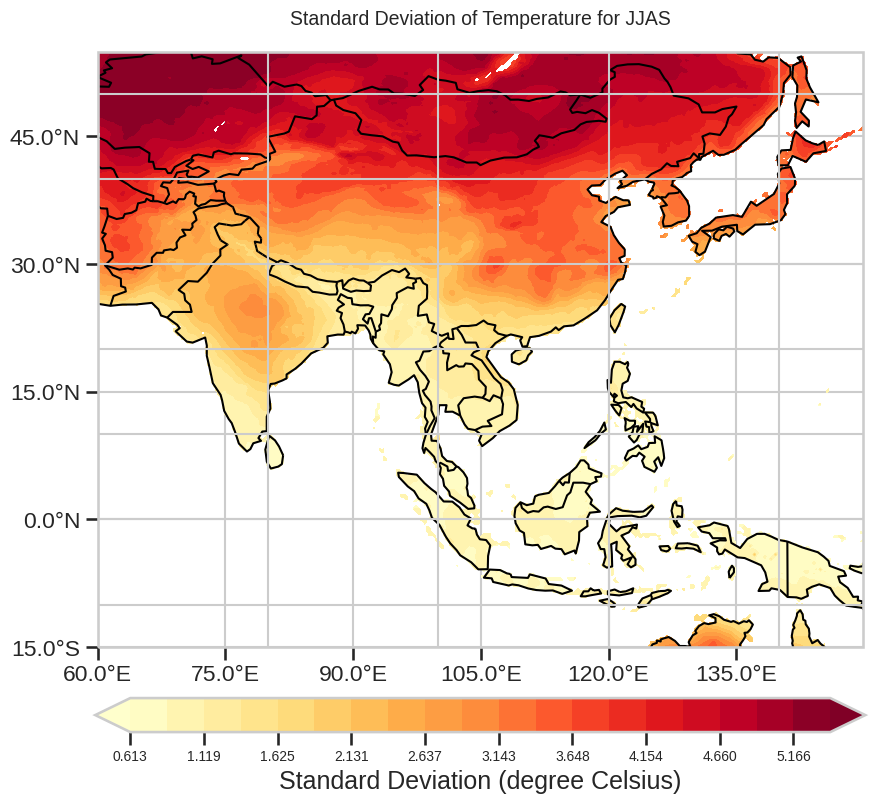

In [33]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Open the dataset
ds = xr.open_mfdataset('APHRO_MA_TAVE_025deg_V1808.*.nc')

# Filter the dataset to include only June, July, August, and September
ds_jjas = ds['tave'].sel(time=ds['tave']['time'].dt.month.isin([6, 7, 8, 9]))

# Calculate the standard deviation of 'tave' for JJA across the time dimension
tave_std_jjas = ds_jjas.std(dim='time')

# Compute the standard deviation
tave_std_jjas = tave_std_jjas.compute()

# Define the figure and axis
fig, ax = plt.subplots(figsize=(11, 8.5), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(bottom=0.2, top=0.9, left=0.05, right=0.95, wspace=0.1, hspace=0.5)

# Dynamically define levels based on the data
min_val = tave_std_jjas.min()
max_val = tave_std_jjas.max()
levels = np.linspace(min_val, max_val, 20)  # Adjust 20 to the desired number of steps

# Make a filled contour plot
cs = ax.contourf(tave_std_jjas['lon'], tave_std_jjas['lat'], tave_std_jjas, 
                 levels=levels, transform=ccrs.PlateCarree(), 
                 cmap='YlOrRd', extend='both')

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, edgecolor='black')

# Add gridlines and format them
def format_lon(value, tick_number):
    return f"{value:.1f}°E" if value >= 0 else f"{abs(value):.1f}°W"

def format_lat(value, tick_number):
    return f"{value:.1f}°N" if value >= 0 else f"{abs(value):.1f}°S"

ax.gridlines()
ax.set_xticks(np.arange(np.floor(min(ds_jjas['lon'])), np.ceil(max(ds_jjas['lon'])), 15), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(np.floor(min(ds_jjas['lat'])), np.ceil(max(ds_jjas['lat'])), 15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_lon))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_lat))

# Add colorbar with increased size
cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.04])  # Adjusted y position of colorbar
cbar = plt.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Standard Deviation (degree Celsius)')
cbar.ax.tick_params(labelsize=10)

# Add title to the map
ax.set_title('Standard Deviation of Temperature for JJAS', fontsize=14, pad=20)

# Save and show the plot
plt.savefig('std_dev_temp_JJAS.png', dpi=300, bbox_inches='tight')
plt.show()

We can see that standard deviation of temperature varies over Asia. Although it seems that the standard deviation increases as we south.

In [ ]:
999